In [1]:
import pandas as pd

videodf = pd.read_csv("data/videos_df.csv")
videodf.head()

,channelId,description,publishedAt,videoId,thumbnails,videoTitle,commentCount,dislikeCount,likeCount,viewCount
0,UCjOl2AUblVmg2rA_cRgZkFg,"In this week's Top Gear, Flintoff gets his han...",2020-10-09 09:35:54,NXX338WY_Lw,https://i.ytimg.com/vi/NXX338WY_Lw/default.jpg,PREVIEW: Attempting 200mph in the Jaguar XJ220...,528.0,257.0,5819.0,184447.0
1,UCjOl2AUblVmg2rA_cRgZkFg,"From the humble new Volkswagen GTI, right down...",2020-10-09 11:21:23,dtHcdU2c71Y,https://i.ytimg.com/vi/dtHcdU2c71Y/default.jpg,Which car will win Top Gear Speed Week 2020? (...,568.0,273.0,7136.0,217619.0
2,UCjOl2AUblVmg2rA_cRgZkFg,Here's Chris Harris' take on the rocket-disgui...,2020-10-07 07:40:22,vnrtWe-RAzg,https://i.ytimg.com/vi/vnrtWe-RAzg/default.jpg,Chris Harris on... the Ferrari SF90 Stradale |...,1091.0,408.0,10189.0,437777.0
3,UCjOl2AUblVmg2rA_cRgZkFg,"16 contenders, 8,553bhp and a festival to reme...",2020-10-06 13:59:38,Ra1F0TsOCPs,https://i.ytimg.com/vi/Ra1F0TsOCPs/default.jpg,Chris Harris vs 2020’s Best Performance Cars |...,579.0,202.0,7126.0,191070.0
4,UCjOl2AUblVmg2rA_cRgZkFg,"The 986bhp Ferrari SF90 is, unsurprisingly, no...",2020-10-06 07:36:13,fXysipmTxcQ,https://i.ytimg.com/vi/fXysipmTxcQ/default.jpg,FASTEST TOP GEAR LAP? Ferrari SF90 Stiglap | T...,888.0,168.0,9697.0,572569.0


In [2]:
stop_words = [word.strip() for word in open('data/stop_words.txt').readlines()]

In [3]:
titlelist = list(videodf['videoTitle'])
print(len(titlelist))

408690


['PREVIEW: Attempting 200mph in the Jaguar XJ220 | Top Gear: Series 29',
 'Which car will win Top Gear Speed Week 2020? (4K) | The Contenders | Top Gear',
 'Chris Harris on... the Ferrari SF90 Stradale | Top Gear',
 'Chris Harris vs 2020’s Best Performance Cars | Top Gear Magazine Speed Week',
 'FASTEST TOP GEAR LAP? Ferrari SF90 Stiglap | Top Gear: Series 29',
 'Chris Harris DRIFTS the 986bhp Ferrari SF90 | Top Gear: Series 29',
 'FIRST DRIVE: McLaren 765LT: Flat out on track in the latest longtail (4K) | Top Gear',
 'Ferrari SF90, F40, Jaguar XJ220, Lamborghini Diablo & Audi RS6 | Cars of Series 29 | Top Gear',
 'FIRST DRIVE: New VW Golf GTI Mk8 2020: In Detail, Interior, Full Driving Review (4K) | Top Gear',
 "FIRST LOOK: New 2020 BMW M3 & M4 feat. 4WD, 503bhp, 'Drift' Mode & *THAT* Grille | Top Gear",
 'FIRST LOOK TRAILER: All New Top Gear | Series 29',
 'MCLAREN SHOWDOWN: P1 vs 720s, Speedtail vs F35, 600LT vs Ferrari Pista | Top Gear',
 'Driving the £5.4m Bugatti Divo | Top Gear'

In [4]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS

In [5]:
from collections import Counter
from nltk.tokenize import RegexpTokenizer
#from stop_words import get_stop_words
import re

top_N = 100
#convert list of list into text
#a=''.join(str(r) for v in df_usa['title'] for r in v)

a = videodf['videoTitle'].str.lower().str.cat(sep=' ')

# removes punctuation,numbers and returns list of words
b = re.sub('[^A-Za-z]+', ' ', a)

#remove all the stopwords from the text
stop_words = [word.strip() for word in open('stop_words.txt').readlines()]       
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)

word_tokens = word_tokenize(b)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

# Remove characters which have length less than 2  
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]        

# Calculate frequency distribution
word_dist = nltk.FreqDist(cleaned_data_title)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])


NameError: name 'plt' is not defined

In [11]:
word_dist

FreqDist({'news': 36149, 'trump': 25071, 'nbc': 19938, 'movieclips': 15288, 'scene': 13619, 'kids': 12056, 'bbc': 11419, 'wwe': 10933, 'nightly': 8966, 'movie': 8743, ...})

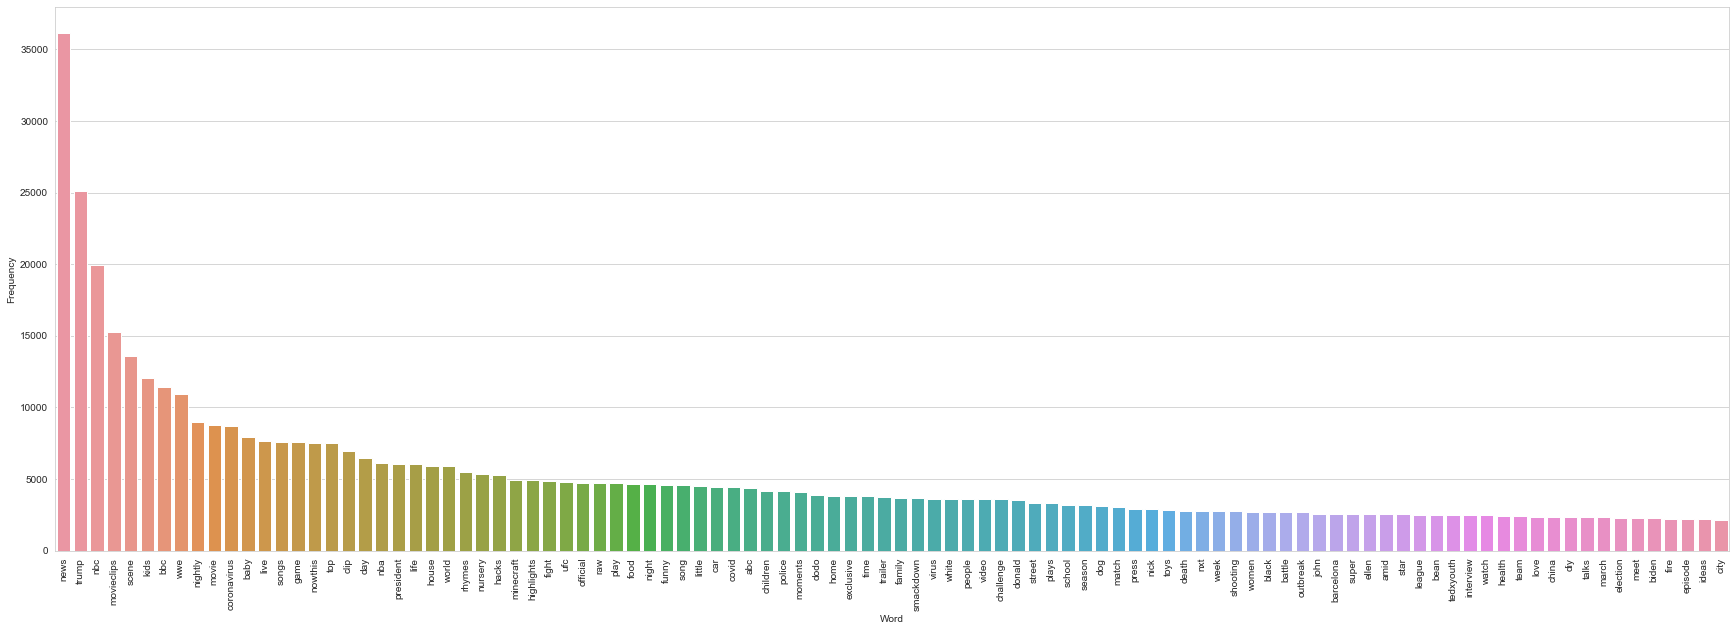

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(30,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt)
plt.xticks(rotation='vertical')

#plt.savefig('PATH')

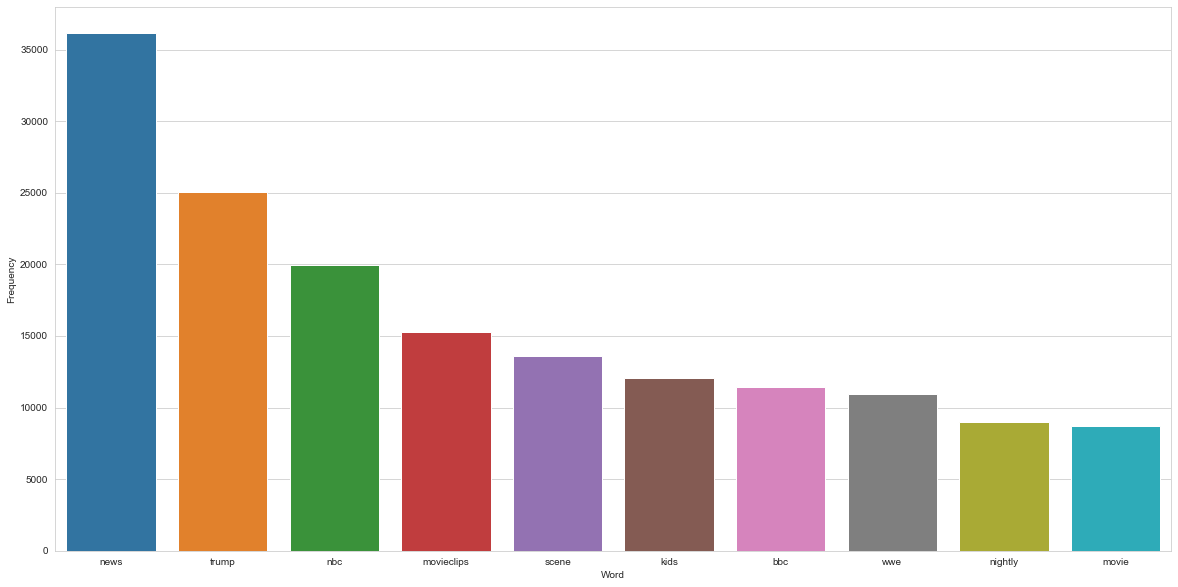

In [65]:
plt.figure(figsize=(20,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(10))

#plt.savefig('PATH')

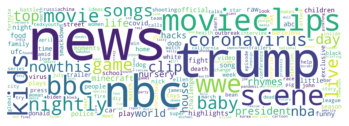

In [51]:
from wordcloud import WordCloud, STOPWORDS

# Create and generate a word cloud image
wordcloud = WordCloud(background_color="white", width=3000, height=1000, stopwords = set(STOPWORDS)).generate_from_frequencies(word_dist)

# Display the generated image
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#Save wordcloud to PNG
#wordcloud.to_file('PATH')

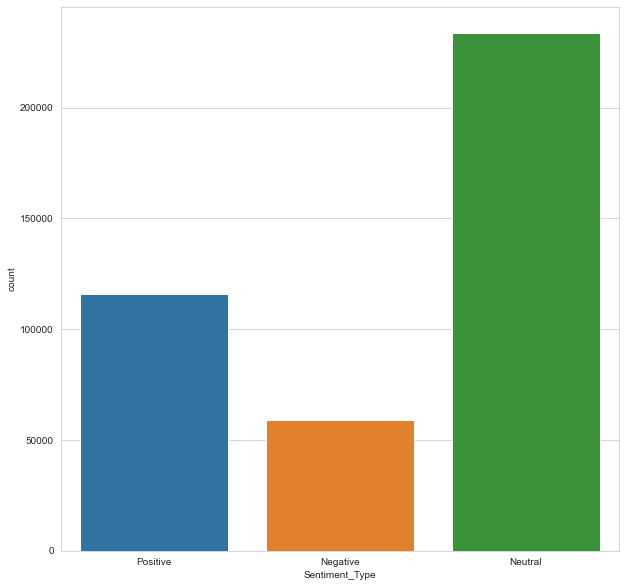

In [18]:
from textblob import TextBlob

bloblist_title = list()

videotitles = videodf['videoTitle']
for row in videotitles:
    blob = TextBlob(row)
    bloblist_title.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    videotitle_polarity = pd.DataFrame(bloblist_title, columns = ['sentence','sentiment','polarity'])
 
def f_title(videotitle_polarity):
    if videotitle_polarity['sentiment'] > 0:
        val = "Positive"
    elif videotitle_polarity['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

videotitle_polarity['Sentiment_Type'] = videotitle_polarity.apply(f_title, axis=1)
plt.figure(figsize=(15,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=videotitle_polarity)
# plt.savefig('PATH')

In [68]:
videoTitleSentiments = pd.merge(videodf['videoId'], videotitle_polarity, left_index=True, right_index=True)
videoTitleSentiments

,videoId,sentence,sentiment,polarity,Sentiment_Type
0,NXX338WY_Lw,PREVIEW: Attempting 200mph in the Jaguar XJ220...,0.50,0.500000,Positive
1,dtHcdU2c71Y,Which car will win Top Gear Speed Week 2020? (...,0.60,0.466667,Positive
2,vnrtWe-RAzg,Chris Harris on... the Ferrari SF90 Stradale |...,0.50,0.500000,Positive
3,Ra1F0TsOCPs,Chris Harris vs 2020’s Best Performance Cars |...,0.75,0.400000,Positive
4,fXysipmTxcQ,FASTEST TOP GEAR LAP? Ferrari SF90 Stiglap | T...,0.50,0.500000,Positive
...,...,...,...,...,...
408685,DaoL1-H1ReE,Rainbow crepes with chocolate brownies,0.00,0.000000,Neutral
408686,ERMJ5xE7-6A,"The ""world's best pizzeria'"" is in London",1.00,0.300000,Positive
408687,scdq2xfCE34,Ice cream-filled donut cones in Prague,0.00,0.000000,Neutral
408688,HgJI5ybtk5Y,Inside London's dim sum chain Ping Pong,0.10,0.500000,Positive


In [70]:
# Saving DF into CSV
videoTitleSentiments.to_csv('data/videoTitleSentiments_df.csv',index = False, header=True)